# Initial setup

In [ ]:
import os
BASE_DIR = f"..{os.sep}..{os.sep}..{os.sep}"
USE_DEEPNOTE = True # In case you would open this notebook via Deepnote

# SCRIPTS IMPORT
import os
import sys
scripts_path = os.path.abspath(os.path.join(f'{BASE_DIR}scripts'))

if scripts_path not in sys.path:
    # Add the scripts to the path
    sys.path.append(scripts_path)
    
    # Import the needed scripts
    from all_scripts import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)
else:
    
    # Import the needed scripts
    from all_scripts import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)

# PLOTS COLOR SETTING - see more here: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
PLOT_COLOR_SETTINGS = sns.color_palette("flare", as_cmap=True)

# Load data, normalize data

In [ ]:
# Load the data
FEATURES_UNNORMALIZED = pd.read_csv("../../models_input/melanoma_training.csv")

# Drop certain columns
FEATURES_UNNORMALIZED = FEATURES_UNNORMALIZED.drop(['image_id'],axis=1)

# Normalize the data
FEATURES = normalizeFeatures(FEATURES_UNNORMALIZED)

# Shuffle randomly the rows
FEATURES = FEATURES.sample(frac=1).reset_index(drop=True)

# Split the data into training and test

In [ ]:
X_train, X_test, y_train, y_test = splitDataIntoTrainTest(FEATURES.iloc[:, 1:], FEATURES.iloc[:, 0])

# Filter feature selection:

Univariate feature selection. 

See more here: 
- https://scikit-learn.org/stable/modules/feature_selection.html 
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

Selecting features manually by score:

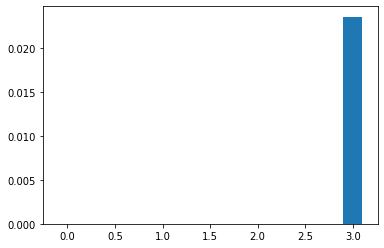

In [ ]:
# Mutual information for feature scoring
feature_scores = featureScores(X_train, y_train, k=2)

# Get no. of features
features = len(feature_scores)

# Visualize feature scores
plt.bar(np.arange(0,features), feature_scores, width=.2)
plt.show()

# Select and build classifiers

In [ ]:
CLFS = {
    "linear_svc": svm.LinearSVC(max_iter = 5000),
    "knn5": KNeighborsClassifier(n_neighbors=5),
    "knn10": KNeighborsClassifier(n_neighbors=10)
}

# Evaluate the results using cross-validation
Read this for interpretation and selection of best measure:
https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124

In [ ]:
crossValidate(X_train, y_train, CLFS)

,classifier_name,accuracy,f1,precision,recall,roc_auc
0,linear_svc,0.596875,0.312660,0.481511,0.234211,0.634891
1,knn5,0.583333,0.429628,0.468959,0.405263,0.554333
2,knn10,0.612500,0.392840,0.526686,0.315789,0.555309


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a47fbf6-c653-4328-90db-f0771def66a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>